In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_samples(n_clusters, n_samples_per_cluster, n_features, embiggen_factor, seed):
    np.random.seed(seed)
    slices = []
    centroids = []
    
    for i in xrange(n_clusters):
        samples = tf.random_normal((n_samples_per_cluster, n_features), 
                                   mean=0.0, stddev=5.0, dtype=tf.float32, seed=seed, name='cluster'+str(i))
#         centroid = tf.random_normal((1, n_features), name='centroid'+str(i)) # * embiggen_factor - embiggen_factor/2
        centroid = (np.random.random((1, n_features)) * embiggen_factor) - (embiggen_factor/2)
        samples += centroid
        centroids += [centroid]
        slices += [samples]
        
    slices = tf.concat(0, slices, name='samples')
    centroids = tf.concat(0, centroids, name='centroids')
    
    return (centroids, slices)

In [3]:
n_features = 2
n_clusters = 3
n_samples_per_cluster = 500
embiggen_factor = 70
seed = 700

centroids, samples = create_samples(n_clusters, n_samples_per_cluster, n_features, embiggen_factor, seed)

with tf.Session() as session:
    tf.train.SummaryWriter('data_logs', session.graph)
    sample_values = session.run(samples)
    centroid_values = session.run(centroids)

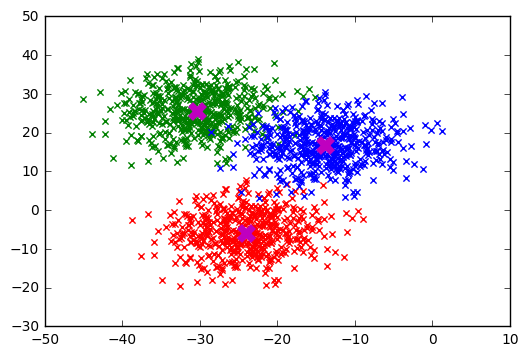

In [10]:
def plot_clusters(samples, centroids):
    n_clusters, n_features = centroids.shape
    slices = np.vsplit(samples, n_clusters)
    
    colour = ['r', 'g', 'b']
    
    for i, cluster in enumerate(slices):
        centroid = centroids[i, :]
        plt.scatter(cluster[:,0], cluster[:,1], marker='x', c=colour[i])
        plt.plot(centroid[0], centroid[1], markersize=10, marker="x", color='m', mew=5)
    
    plt.show()
    
plot_clusters(sample_values, centroid_values)

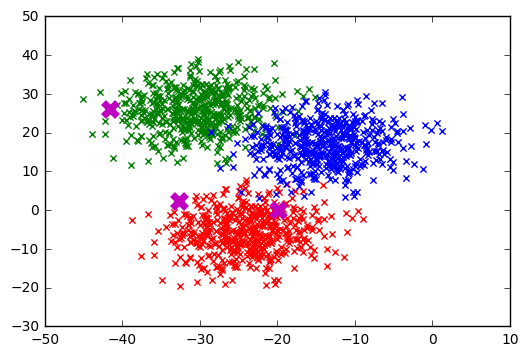

In [8]:
def choose_random_centroids(samples, n_clusters):
    n_samples = tf.shape(samples)[0]
    indices = tf.range(0, n_samples)
    indices = tf.random_shuffle(indices)
    centroid_indices = tf.slice(indices, [0], [n_clusters])
    return tf.gather(samples, centroid_indices)

c = choose_random_centroids(samples, n_clusters)
with tf.Session() as session:
    c_vs = session.run(c)
    
plot_clusters(sample_values, c_vs)